In [1]:
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/f1driversnation.csv'
DriversNations = pd.read_csv(url,index_col=0)

In [3]:
DriversNations.rename({'count(code)':'Number of F1 Drivers','nationality':'Nationality'},axis='columns',inplace=True)

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DriversNations

,Number of F1 Drivers
nationality,
British,165
American,157
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
South African,23
Swiss,23


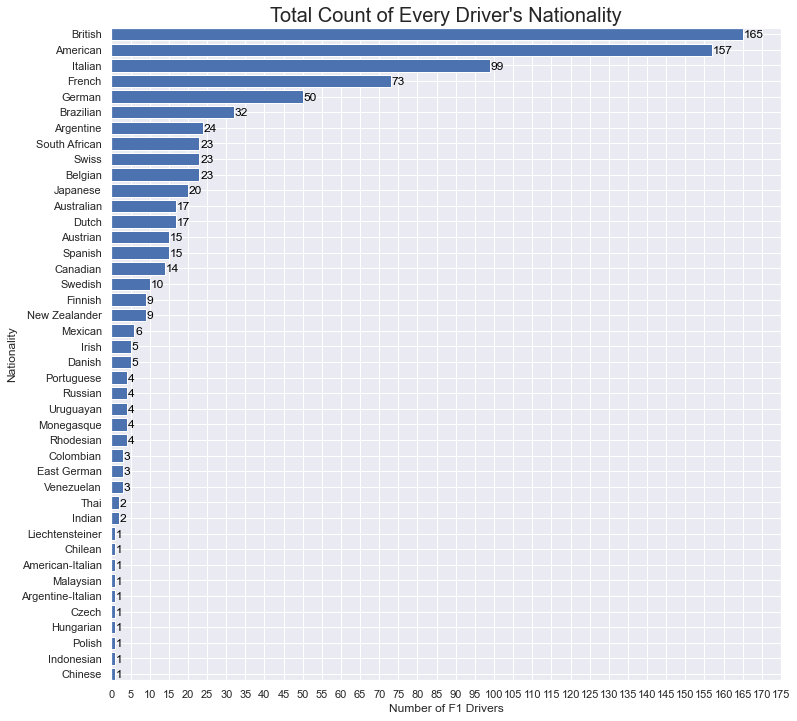

In [6]:
plt.figure(figsize=(12,12))
sns.set(rc={'figure.figsize':(12,12)})

y = DriversNations.index
x = DriversNations['Number of F1 Drivers']
plt.barh(y, width=x)
plt.gca().invert_yaxis()
plt.margins(y=0)
plt.title("Total Count of Every Driver's Nationality", fontsize=20)
plt.xticks(np.arange(0,180,step=5))
plt.ylabel('Nationality')
plt.xlabel('Number of F1 Drivers')
for i, v in enumerate(DriversNations['Number of F1 Drivers']):
    plt.text(v+0.2, i+.25, str(round(v, 2)), color='black')

plt.savefig('F1DriverNationsBar.jpeg')

plt.show()

In [7]:
percents=[]
for c in DriversNations['Number of F1 Drivers']:
    percent = c / (sum(DriversNations['Number of F1 Drivers']))*100
    percents.append("{:.1f}".format(percent)) 
print(percents)

['19.3', '18.4', '11.6', '8.5', '5.9', '3.7', '2.8', '2.7', '2.7', '2.7', '2.3', '2.0', '2.0', '1.8', '1.8', '1.6', '1.2', '1.1', '1.1', '0.7', '0.6', '0.6', '0.5', '0.5', '0.5', '0.5', '0.5', '0.4', '0.4', '0.4', '0.2', '0.2', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1']


In [8]:
legend = DriversNations.index +' '+'-'+ ' ' + percents + '%'

print(legend)

Index(['British - 19.3%', 'American - 18.4%', 'Italian - 11.6%',
       'French - 8.5%', 'German - 5.9%', 'Brazilian - 3.7%',
       'Argentine - 2.8%', 'South African - 2.7%', 'Swiss - 2.7%',
       'Belgian - 2.7%', 'Japanese - 2.3%', 'Australian - 2.0%',
       'Dutch - 2.0%', 'Austrian - 1.8%', 'Spanish - 1.8%', 'Canadian - 1.6%',
       'Swedish - 1.2%', 'Finnish - 1.1%', 'New Zealander - 1.1%',
       'Mexican - 0.7%', 'Irish - 0.6%', 'Danish - 0.6%', 'Portuguese - 0.5%',
       'Russian - 0.5%', 'Uruguayan - 0.5%', 'Monegasque - 0.5%',
       'Rhodesian - 0.5%', 'Colombian - 0.4%', 'East German - 0.4%',
       'Venezuelan - 0.4%', 'Thai - 0.2%', 'Indian - 0.2%',
       'Liechtensteiner - 0.1%', 'Chilean - 0.1%', 'American-Italian - 0.1%',
       'Malaysian - 0.1%', 'Argentine-Italian - 0.1%', 'Czech - 0.1%',
       'Hungarian - 0.1%', 'Polish - 0.1%', 'Indonesian - 0.1%',
       'Chinese - 0.1%'],
      dtype='object', name='nationality')


In [9]:
from random import randint

color = []
n = len(DriversNations)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

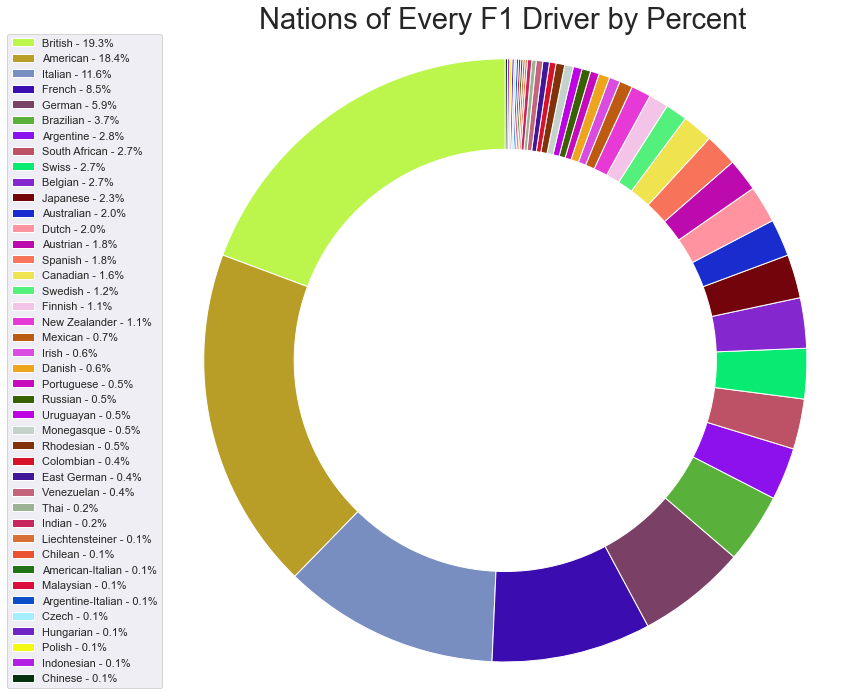

In [10]:
labels = list(len(DriversNations)*' ')

plt.pie(DriversNations['Number of F1 Drivers'],labels=labels, colors = color, startangle= 90 )

title = plt.title('Nations of Every F1 Driver by Percent',fontdict = {'fontsize' : 29})
title.set_ha("center")
plt.gca().axis("equal")

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend(legend, bbox_to_anchor=(0, 0.5), loc = 'right')

plt.savefig('F1DriverNationsPie.jpeg')
plt.show()

## Exploring why there are so many American Drivers

In [18]:
url = 'https://raw.githubusercontent.com/jdodway/F1Analysis/main/F1QueryResults/F1AmericanTimeline.csv'
AmericanTimeline = pd.read_csv(url)
AmericanTimeline

,year,Circuit Name,Number of American Drivers
0,1950,Circuit Bremgarten,1
1,1950,Circuit de Monaco,1
2,1950,Indianapolis Motor Speedway,34
3,1951,Autodromo Nazionale di Monza,1
4,1951,Circuit Bremgarten,1
...,...,...,...
464,2015,Autodromo Hermanos Rodriguez,1
465,2015,Autodromo Jose Carlos Pace,1
466,2015,Circuit of the Americas,1
467,2015,Marina Bay Street Circuit,1


In [20]:
AmericanTimeline[AmericanTimeline['year']==1983]

,year,Circuit Name,Number of American Drivers
327,1983,A1-Ring,2
328,1983,Autodromo Enzo e Dino Ferrari,2
329,1983,Autodromo Internacional Nelson Piquet,2
330,1983,Autodromo Nazionale di Monza,2
331,1983,Brands Hatch,2
332,1983,Circuit de Monaco,2
333,1983,Circuit de Spa-Francorchamps,2
334,1983,Circuit Gilles Villeneuve,2
335,1983,Circuit Park Zandvoort,2
336,1983,Circuit Paul Ricard,2


In [19]:
AmericanTimeline[AmericanTimeline['Circuit Name']=='Indianapolis Motor Speedway'].set_index('year')

,Circuit Name,Number of American Drivers
year,,
1950,Indianapolis Motor Speedway,34
1951,Indianapolis Motor Speedway,34
1952,Indianapolis Motor Speedway,32
1953,Indianapolis Motor Speedway,37
1954,Indianapolis Motor Speedway,42
1955,Indianapolis Motor Speedway,35
1956,Indianapolis Motor Speedway,34
1957,Indianapolis Motor Speedway,33
1958,Indianapolis Motor Speedway,33


The USA GP in the 50's was an all-American grid, with American reserve drivers as well. This causes an inflated number of total American drivers since 1950. 

## Let's see a new count of F1 nationalities without consideration of Indy 500